<a href="https://colab.research.google.com/github/AngelicaPorras/Topicos-en-estadistica/blob/main/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tarea 5**
Primero importamos las librerías que vamos a usar


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving fetal2020.csv to fetal2020.csv


Ahora, subimos la base de datos con la que vamos a trabajar

In [ ]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')
# tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-3-63b2ddeb0714>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


Construimos una nueva base de datos con las variables de interés.

In [ ]:
df = tabla[["SEXO", "P_PMAN_IRIS", "T_GES" , "PESO_NAC"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(4)


<ipython-input-4-28322e416a7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,T_GES,PESO_NAC
COD_DPTO,,,,
70,3,nan,1,9
11,3,0.0,1,1
11,1,0.0,2,1
11,3,nan,1,1


In [ ]:

df.loc[(df.P_PMAN_IRIS == "nan"), 'P_PMAN_IRIS'] = "6" #cambiamos el nan por el número 6, como lo indica la fuente de donde saqué la base de datos
df.head(4)

,SEXO,P_PMAN_IRIS,T_GES,PESO_NAC
COD_DPTO,,,,
70,3,6,1,9
11,3,0.0,1,1
11,1,0.0,2,1
11,3,6,1,1


## Procedimiento 1
Primero, convertimos las variables en dummies, como lo pide el ejercicio

In [ ]:
dummia = pd.get_dummies(df["SEXO"], dtype = float)
dummia.columns = ['Masculino','Femenino', 'Indeterminado']
dummib = pd.get_dummies(df["P_PMAN_IRIS"], dtype = float)
dummib.columns = ['Natural','Homicidio','Accidente','Pendiente','Indeterminado','Desconocido','Desconocido']
dummic = pd.get_dummies(df["T_GES"], dtype = float)
dummic.columns = ['<22','22-27','28-37','38-41','>=42','Sin información']
#dummid = pd.get_dummies(df["PESO_NAC"], dtype = float)
#dummid.columns = ['<1.000gr','1.000-1.499gr','1.500-1.999gr','2.000-2499gr',
                  #'2.500-2.999','3.000-3499','3.500-3.999','>=4.000','Sin información']

In [ ]:
df.PESO_NAC =df.PESO_NAC.astype(str)
df.loc[(df.PESO_NAC == "1"), 'PESO_NAC'],df.loc[(df.PESO_NAC == "2"), 'PESO_NAC'] ="<1.000gr","1.000-1.499gr"
df.loc[(df.PESO_NAC == "3"), 'PESO_NAC'],df.loc[(df.PESO_NAC == "4"), 'PESO_NAC'] = "1.500-1.999gr","2.000-2499gr"
df.loc[(df.PESO_NAC == "5"), 'PESO_NAC'],df.loc[(df.PESO_NAC == "6"), 'PESO_NAC'] = "2.500-2.999","3.000-3499"
df.loc[(df.PESO_NAC == "7"), 'PESO_NAC'],df.loc[(df.PESO_NAC == "8"), 'PESO_NAC'] = "3.500-3.999",">=4.000"
df.loc[(df.PESO_NAC == "9"), 'PESO_NAC'] ="Sin información"

<ipython-input-7-faa133bc6f52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.PESO_NAC =df.PESO_NAC.astype(str)


In [ ]:
dummifinal = pd.concat([dummia,dummib,dummic,df.PESO_NAC], axis=1)
dummifinal

,Masculino,Femenino,Indeterminado,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,Desconocido,<22,22-27,28-37,38-41,>=42,Sin información,PESO_NAC
COD_DPTO,,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sin información
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,<1.000gr
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,<1.000gr
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,<1.000gr
11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.500-1.999gr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,<1.000gr
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sin información
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sin información


Ahora usamos la función, train_test_split con el 30% de los datos de validación

In [ ]:
x = df.drop("PESO_NAC", axis=1)
y = df["PESO_NAC"]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)
trainX

,SEXO,P_PMAN_IRIS,T_GES
COD_DPTO,,,
54,3,6,1
11,1,6,2
5,3,6,1
23,1,6,3
66,1,6,1
...,...,...,...
54,2,6,1
41,3,0.0,1
44,2,6,3


## Procedimiento 2


In [ ]:
sc=StandardScaler()
# scaler = sc.fit(trainX)
# trainX_scaled = scaler.transform(trainX)
# testX_scaled = scaler.transform(testX)

Usando en R el sample nos da lo siguiente:
##### > sample(3:24, size = 1)
#####[1] 8   #Capas
#####> sample(3:24, size = 1)
#####[1] 19  #Nodos

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(19,19,19,19,19,19,19,19),
                        max_iter = 500, activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX, trainY)

MLPClassifier(hidden_layer_sizes=(19, 19, 19, 19, 19, 19, 19, 19), max_iter=500)

##Procedimiento 3
Primero, calculamos la exactitud

In [ ]:
y_pred = mlp_clf.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Exactitud: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.75
Exactitud: 0.75


Ahora, pasamos a realizar la matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

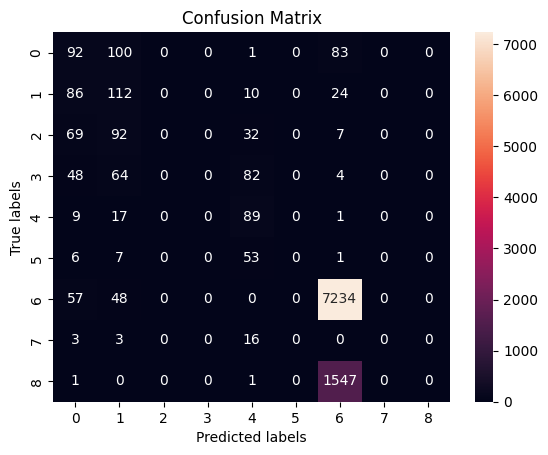

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

Ahora, realizamos la curva de perdida

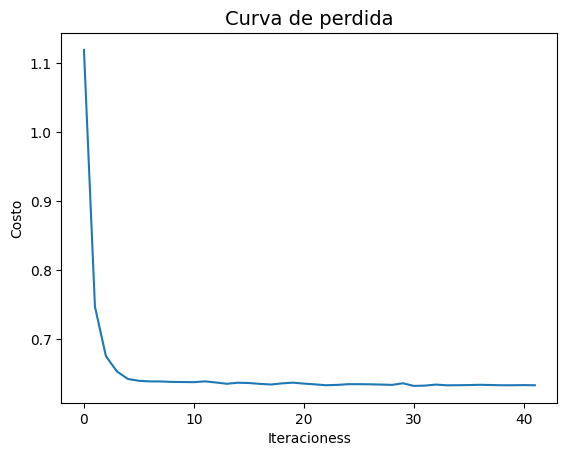

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()

## Procedimiento 4

In [ ]:
no_obs = np.array([[2,0,1]])
no_obs
mlp_clf.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['<1.000gr'], dtype='<U15')

In [ ]:
no_obs = np.array([[2,0,5]])
no_obs
mlp_clf.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['3.000-3499'], dtype='<U15')

Se puede observar que el tiempo de gestación es un factor muy importante para determinar el peso del recién nacido al momento del fallecimiento.

##Procedimiento 5
Haremos lo mismo que en el procedimiento 2 y 3, pero con 8 capas ocultas demás

In [ ]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19),
                        max_iter = 500, activation = 'relu',
                        solver = 'adam')
mlp_clf2.fit(trainX, trainY)

MLPClassifier(hidden_layer_sizes=(19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
                                  19, 19, 19, 19, 19),
              max_iter=500)

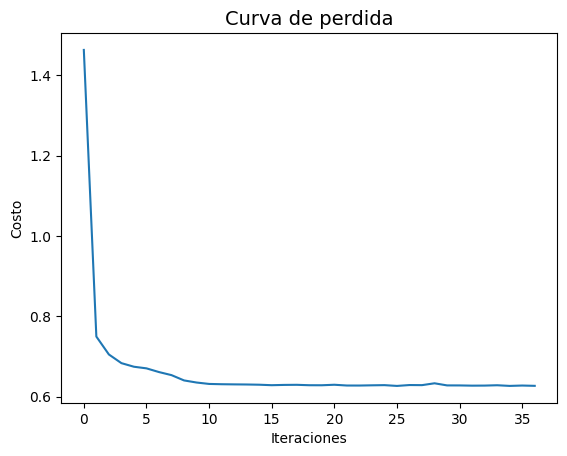

In [ ]:
plt.plot(mlp_clf2.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()

In [ ]:
y_pred = mlp_clf2.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Exactitud: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.75
Exactitud: 0.75


Podemos notar que ambos modelos tienen la misma exactitud.